In [52]:
import  pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("Reddit_Data.csv")
df.head(10)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


In [54]:
df.shape

(37249, 2)

In [55]:
df.category.value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [56]:
df['clean_comment'] = df['clean_comment'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [57]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [58]:
df["clean_comment"].isnull().sum()

np.int64(100)

In [59]:
df = df.dropna()
df["clean_comment"].isnull().sum()

np.int64(0)

In [60]:
df.shape

(37149, 2)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [62]:
df["clean_comment"][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [63]:
df["clean_comment"] = df["clean_comment"].str.replace("[^a-zA-Z#]", " ")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [64]:
df.describe()

,category
count,37149.000000
mean,0.203316
std,0.779491
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [65]:
df["clean_comment"]= df["clean_comment"].str.strip().str.replace(r'\s+', ' ', regex=True)
df.head()


,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [66]:
df.duplicated().sum()

np.int64(541)

In [67]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [68]:
df[(df['clean_comment'].str.strip() == '')].count()


clean_comment    1
category         1
dtype: int64

In [69]:
df.drop(df[df['clean_comment'].str.strip() == ''].index, inplace=True)
df[(df['clean_comment'].str.strip() == '')].count()

clean_comment    0
category         0
dtype: int64

In [70]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [71]:
df.shape

(36607, 2)

In [72]:
df.isna().sum()

clean_comment    0
category         0
dtype: int64

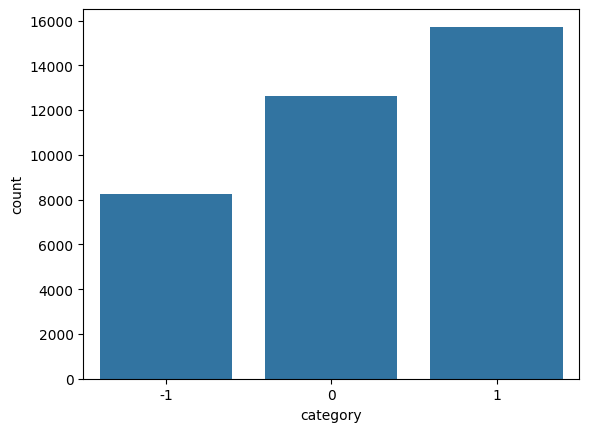

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


sns.countplot(x='category', data=df)
plt.show()

In [74]:
df["category"].value_counts(normalize=True).mul(100).round(2)

category
 1    42.95
 0    34.56
-1    22.49
Name: proportion, dtype: float64

In [75]:
df["word_count"] = df["clean_comment"].apply(lambda x: len(str(x).split(" ")))
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [76]:
df.describe()

,category,word_count
count,36607.000000,36607.000000
mean,0.204633,29.806649
std,0.782675,56.900364
min,-1.000000,1.000000
25%,0.000000,7.000000
50%,0.000000,13.000000
75%,1.000000,30.000000
max,1.000000,1307.000000


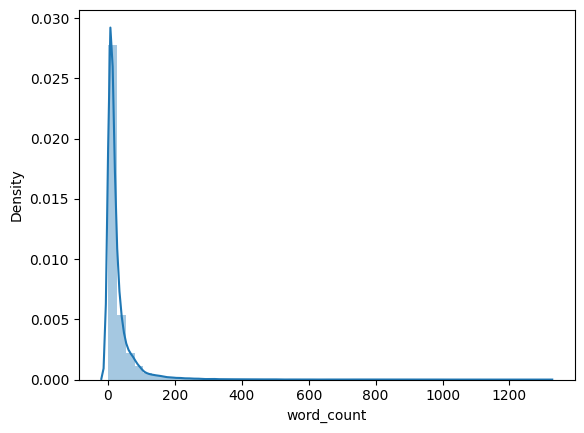

In [77]:
sns.distplot(df["word_count"],kde=True)
plt.show()

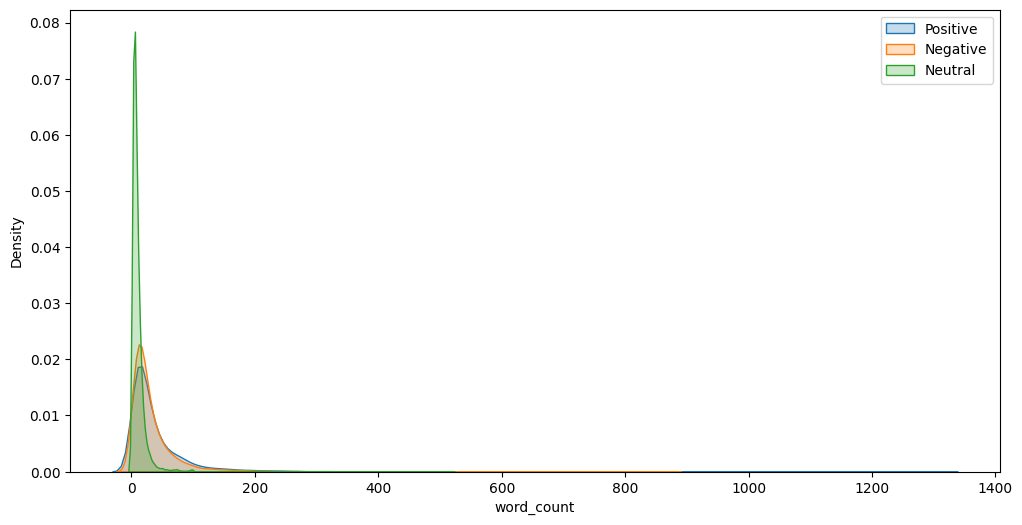

In [78]:
fig = plt.figure(figsize=(12,6))

sns.kdeplot(x=df[df["category"]==1]["word_count"], shade=True, label = "Positive",fill=True)
sns.kdeplot(x=df[df["category"]==-1]["word_count"], shade=True, label = "Negative",fill=True)
sns.kdeplot(x=df[df["category"]==0]["word_count"], shade=True, label = "Neutral",fill=True)

plt.legend()

plt.show()

In [79]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [80]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')

stopword = set(stopwords.words('english'))

df["stopword_count"] = df["clean_comment"].apply(lambda x: len([w for w in x.split() if w in stopword]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bipra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_comment,category,word_count,stopword_count
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


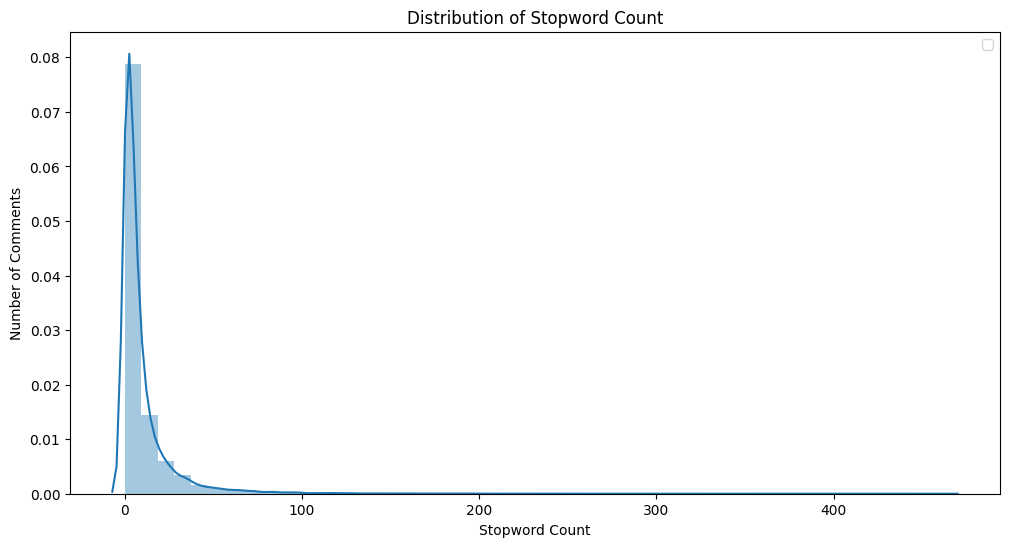

In [81]:
plt.figure(figsize=(12,6))

sns.distplot(df["stopword_count"],kde=True)
plt.title("Distribution of Stopword Count")
plt.xlabel("Stopword Count")
plt.ylabel("Number of Comments")
plt.legend()

plt.show()

In [82]:
from collections import Counter

all_stopwords = Counter()
for comment in df["clean_comment"]:
    for word in comment.split():
        if word in stopword:
            all_stopwords[word] += 1

top_25_common_stopwords = all_stopwords.most_common(25)

top_25_df = pd.DataFrame(top_25_common_stopwords, columns=["Stopword", "Count"])



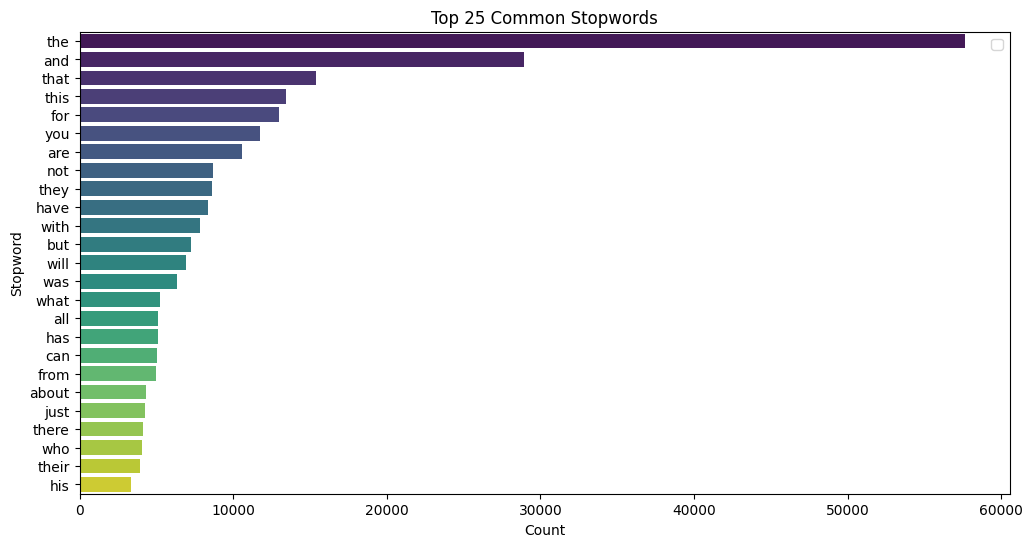

In [83]:
plt.figure(figsize=(12,6))

sns.barplot(data = top_25_df, x=top_25_df["Count"], y=top_25_df["Stopword"], palette="viridis")
plt.title("Top 25 Common Stopwords")
plt.xlabel("Count")
plt.ylabel("Stopword")
plt.legend()

plt.show()

In [84]:
df["num_characters"] = df["clean_comment"].apply(lambda x: len(x))
df.head()

,clean_comment,category,word_count,stopword_count,num_characters
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [85]:
df["num_characters"].describe()

count    36607.000000
mean       182.710055
std        360.406017
min          1.000000
25%         38.000000
50%         80.000000
75%        185.000000
max       8664.000000
Name: num_characters, dtype: float64

In [86]:
from collections import Counter

all_characters = Counter()
for comment in df["clean_comment"]:
    for char in comment:
        all_characters[char] += 1

top_50_common_characters = all_characters.most_common(50)

top_50_df = pd.DataFrame(top_50_common_characters, columns=["Character", "Count"])
top_50_df = top_50_df.sort_values(by="Count", ascending=False)
top_50_df.head(25)


,Character,Count
0,,1054525
1,e,666398
2,t,491133
3,a,480917
4,i,401241
5,n,388326
6,o,379756
7,s,355167
8,r,331327
9,h,296616


In [87]:
all_characters.keys()

dict_keys(['f', 'a', 'm', 'i', 'l', 'y', ' ', 'o', 'r', 'n', 'h', 'v', 'e', 't', 'd', 'x', 'p', 's', 'u', 'z', 'k', 'g', 'c', 'q', 'b', 'w', 'j', '5', '6', 'é', '4', '0', '1', 'ā', 'ī', 'ū', 'ś', '2', '8', '9', '’', '…', 'ا', 'ل', 'ع', 'ن', 'ة', 'ي', 'ك', 'ق', 'ض', 'ب', 'ف', 'ر', '3', '7', '“', '”', '≠', '\\', '°', 'ः', 'अ', 'र', 'व', 'ि', 'ं', 'े', 'ी', 'ा', 'ो', '्', '\u200d', 'ब', 'ढ़', 'त', 'स', 'प', 'ू', 'ु', 'क', 'ल', 'म', '।', 'ड़', 'इ', 'न', 'ृ', '®', '©', '•', '⌐', '■', '‘', '–', '£', '\u200f', '@', '—', '़', 'आ', 'द', 'य', 'ै', '±', 'ड', 'ँ', 'ई', 'á', 'ó', '‿', 'ॉ', '★', '⊙', 'ह', 'उ', 'ग', 'ौ', '\u202a', '\u200e', '\u202c', '日', '本', '語', 'で', '投', '稿', 'し', 'て', 'も', 'い', 'た', 'だ', 'け', 'ま', 'す', 'ょ', 'う', 'か', '？', 'そ', 'ら', '私', 'が', '翻', '訳', 'さ', 'せ', 'き', '。', 'ん', '、', '上', '記', 'の', 'ち', 'っ', 'と', 'わ', 'り', 'に', 'く', '一', '度', 'は', 'や', '英', 'み', '少', 'る', '助', 'ほ', 'な', '分', 'あ', 'げ', 'お', 'メ', 'ッ', 'セ', 'ー', 'ジ', 'を', 'れ', 'ば', '共', '有', 'こ', '以', 'イ', 'べ', '新', '材'

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_grams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2,),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


top_25_bi_grams = get_top_n_grams(df["clean_comment"], 25)
top_25_bi_grams_df = pd.DataFrame(top_25_bi_grams, columns=["Bigram", "Count"])
top_25_bi_grams_df.head(25)

,Bigram,Count
0,free encyclopedia,623
1,encyclopedia team,598
2,good good,409
3,prime minister,388
4,best overall,375
5,don know,352
6,looks like,339
7,don think,334
8,team reached,322
9,social media,316


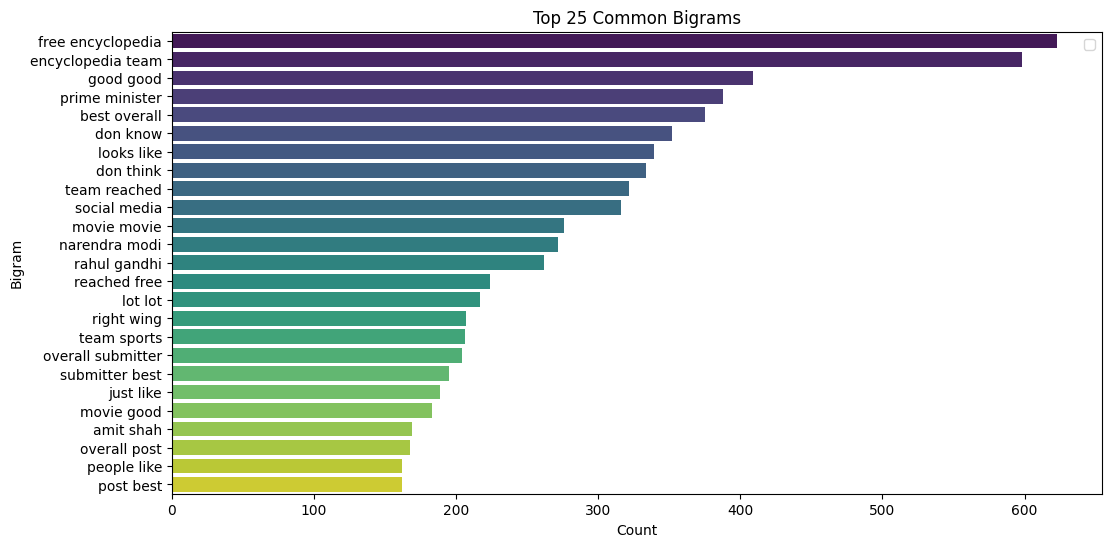

In [89]:
plt.figure(figsize=(12,6))

sns.barplot(data = top_25_bi_grams_df, x=top_25_bi_grams_df["Count"], y=top_25_bi_grams_df["Bigram"], palette="viridis")
plt.title("Top 25 Common Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.legend()

plt.show()

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_tri_grams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


top_25_tri_grams = get_top_tri_grams(df["clean_comment"], 25)
top_25_tri_grams_df = pd.DataFrame(top_25_tri_grams, columns=["trigram", "Count"])
top_25_tri_grams_df.head(25)

,trigram,Count
0,free encyclopedia team,598
1,good good good,385
2,encyclopedia team reached,316
3,movie movie movie,266
4,team reached free,224
5,reached free encyclopedia,223
6,best overall submitter,204
7,lot lot lot,200
8,overall submitter best,195
9,submitter best overall,194


In [91]:
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [92]:
all_text = ''.join(df['clean_comment'])

# Get unique characters
unique_characters = set(all_text)

# Print the unique characters
print("Unique characters:", unique_characters)

Unique characters: {'i', 'y', 'r', 'm', 'v', 'k', 'x', 's', 'p', 'j', 'a', 'n', 'w', 'b', 'd', 'o', 'e', 'u', 'z', ' ', 'f', 'c', 'g', 't', 'l', 'q', 'h'}


In [93]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))



In [94]:
df.head()

,clean_comment,category,word_count,stopword_count,num_characters
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism ha very much lot compatible with chri...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


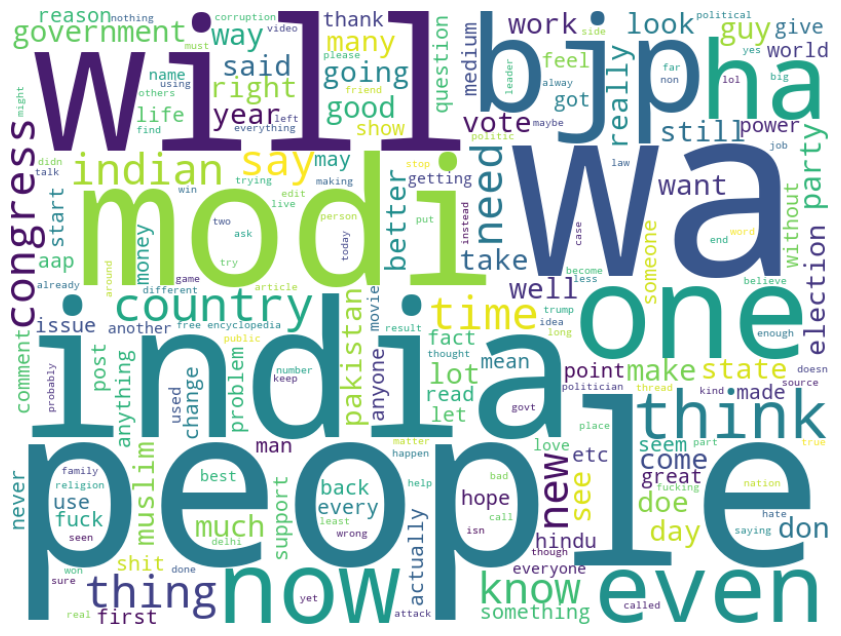

In [95]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=600, background_color='white').generate(df["clean_comment"].str.cat(sep=" "))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [96]:
df.describe()

,category,word_count,stopword_count,num_characters
count,36607.000000,36607.000000,36607.000000,36607.000000
mean,0.204633,29.806649,9.887644,182.710055
std,0.782675,56.900364,19.418194,360.406017
min,-1.000000,1.000000,0.000000,1.000000
25%,0.000000,7.000000,1.000000,38.000000
50%,0.000000,13.000000,4.000000,80.000000
75%,1.000000,30.000000,10.000000,185.000000
max,1.000000,1307.000000,463.000000,8664.000000
